In [2]:
### BIO index clustering - python-only pipeline



In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [4]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py'>

# this bit is clustering and doesn't need rerunning

## masking edges

In [5]:
# bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
# grid = mf.import_bathy(bath)
# fmask = (grid.fmask[0,0,:,:]) 

# stn_x, stn_y = mf.make_stns(10)
# d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

# d_stn_xar0 = np.array(d_stn_x)
# d_stn_yar0 = np.array(d_stn_y)

# edge = np.where((d_stn_xar0<=10) | (d_stn_yar0>=888))
# np.squeeze(edge)
# np.shape(edge)
# edgear = np.array(edge)
# edgear = edgear[0]
# print(edge)
# d_stn_xar =np.delete(d_stn_xar0,edge)
# d_stn_yar = np.delete(d_stn_yar0,edge)
# print(np.size(d_stn_xar))


    

In [6]:
# ## areas of stations

# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# ydir = w['e1t'][0,:,:]
# xdir = w['e2t'][0,:,:]
# aos = ydir*xdir
# print(aos[250,250])

# stn_areas = np.zeros(580)
# for i in range(0,580):
#     t_x = d_stn_xar0[i]
#     t_y = d_stn_yar0[i]
#     stn_areas[i] = aos[t_y,t_x]


#### agglomerate signals extracted and save as .pkl, for year in 2013-2016

In [7]:
# # do this for years 2013  to 2016
# years = ['2013','2014','2015','2016']

# for year in years:
#     if year == '2016':
#         noday = 366
#     if year != '2016':
#         noday = 365
        
#     print(year)
#     basedir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/'


#     varfolder = 'BIO_TS'
#     tname = './pkls/biomass_datamat_'+year+'.pkl'
    
#     signalmat = np.zeros([np.size(d_stn_xar),noday])
#     count = 0 
#     for i in range(0,580):
        
#         if i not in edgear:
#                 #stn_360_sp10.nc
#             pattern  = f'stn_{i}_sp10.nc'
            
#             tdat = nc.Dataset(basedir+year +'/'+ varfolder +'/'+pattern)
#            # print(tdat)
#             tot_bio = (tdat['PHY'][:]+tdat['PHY2'][:]+tdat['MYRI'][:])/stn_areas[i]
#             signalmat[count,0:noday] = tot_bio
            
# #             signalmat[count,(noday):(noday*2)] = tdat['PHY2'][:]/stn_areas[i]
# #             signalmat[count,noday*2:noday*3] = tdat['MYRI'][:]/stn_areas[i]
#             count = count+1

#     pickle.dump(signalmat, open(tname, 'wb'))
    


## open the resulting signalmats, cluster from 2-N (N=100) clusters, save linkage matrix and cluster matrices, visualise dendrograms

In [8]:
# for year in years:
#     print(year)
#     signalmat = pickle.load(open('./pkls/biomass_datamat_'+year+'.pkl', 'rb'))

#     Z = linkage(signalmat, 'ward')
#     pickle.dump(Z, open('./pkls/biomass_linkmat_'+year+'.pkl', 'wb'))
    
#     clustermat = np.zeros([100,np.size(d_stn_xar)])                           
#     for k in range(0,100): 
#         clustermat[k,:] = fcluster(Z, k+1, criterion='maxclust')
#     pickle.dump(clustermat, open('./pkls/biomass_clustmat_'+year+'.pkl', 'wb'))

## this bit is plotting 

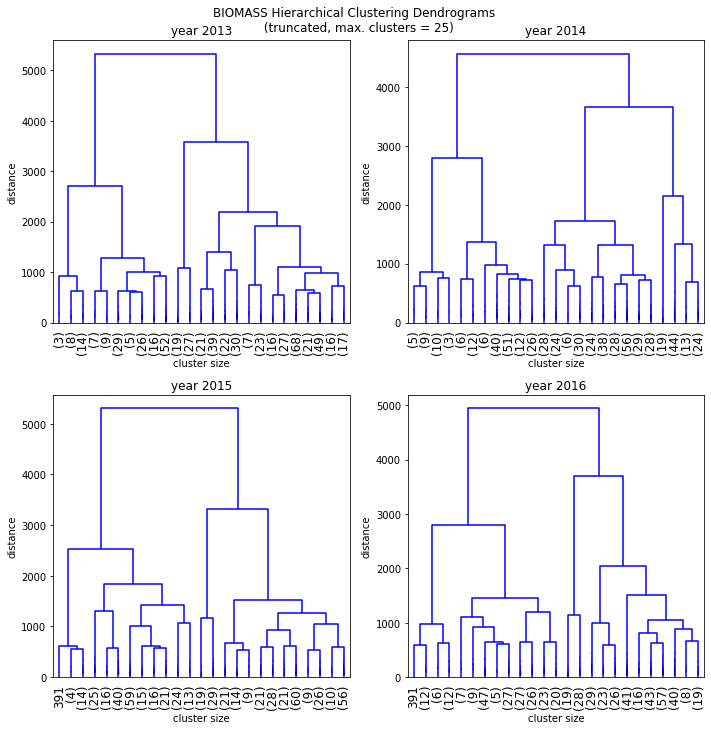

In [9]:
fact = 1
ms = 4
markersize = 10
legfontsize = 8

fig = plt.figure(figsize=(10*fact, 10*fact))

#####biomass
ax1 = plt.subplot2grid((2,2),(0,0))
Z = pickle.load(open('./pkls/biomass_linkmat_2013.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')

ax1 = plt.subplot2grid((2,2),(0,1))
Z = pickle.load(open('./pkls/biomass_linkmat_2014.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')

ax1 = plt.subplot2grid((2,2),(1,0))
Z = pickle.load(open('./pkls/biomass_linkmat_2015.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')

ax1 = plt.subplot2grid((2,2),(1,1))
Z = pickle.load(open('./pkls/biomass_linkmat_2016.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')

plt.suptitle('BIOMASS Hierarchical Clustering Dendrograms \n (truncated, max. clusters = 25)', y = 1.01)
plt.tight_layout()
plt.show()

var = 'BIOMASS'
fig.savefig(f'./paper_figs/{var}_dendrograms.pdf', bbox_inches='tight')

#### 'objective' measures of clustering are sometimes hard to defend

##### one way to circumvent this obvious problem is to look manually at the visual clusters provided


## 2013

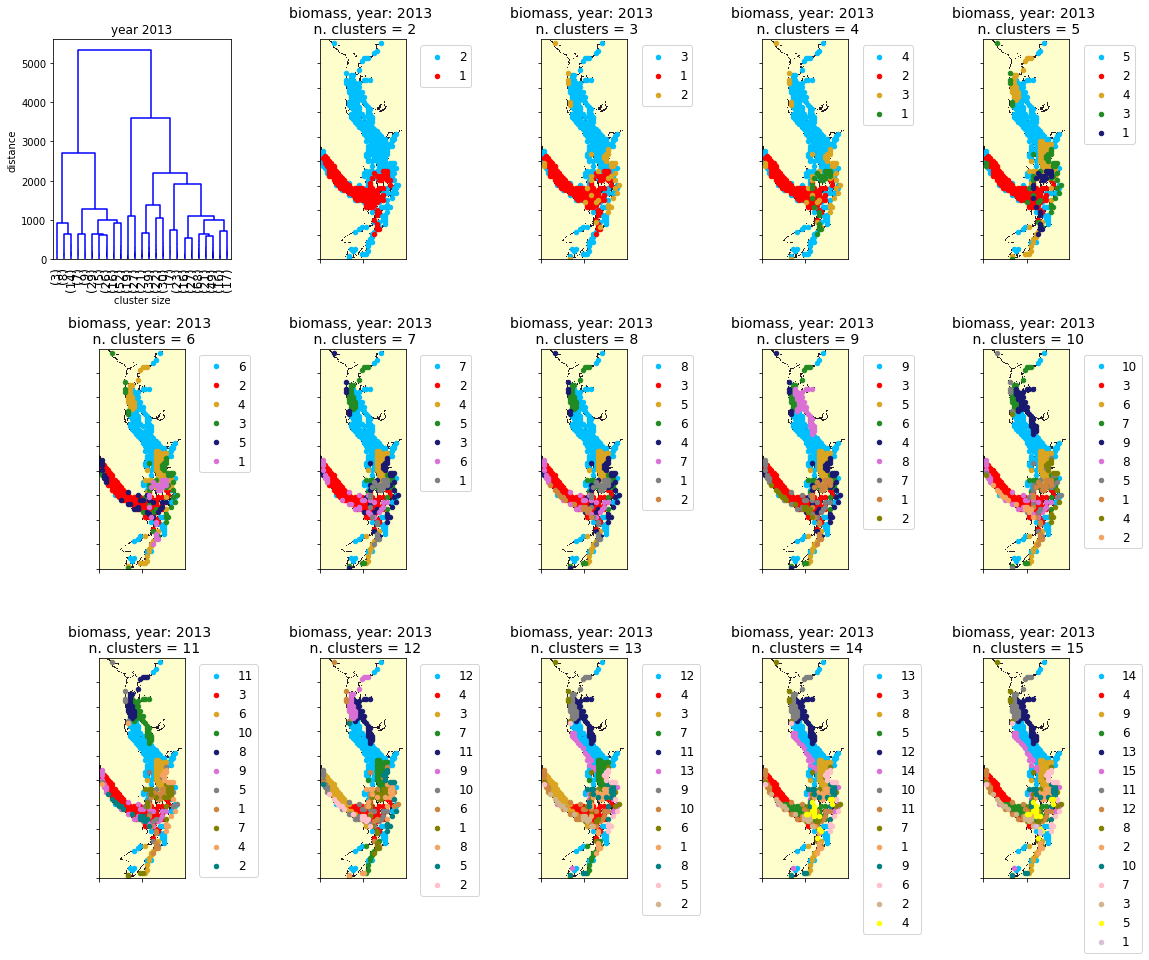

In [10]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('./pkls/biomass_linkmat_2013.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2013','biomass',2)
vp.clusters(axs[0,2],'2013','biomass',3)
vp.clusters(axs[0,3],'2013','biomass',4)
vp.clusters(axs[0,4],'2013','biomass',5)

vp.clusters(axs[1,0],'2013','biomass',6)
vp.clusters(axs[1,1],'2013','biomass',7)
vp.clusters(axs[1,2],'2013','biomass',8)
vp.clusters(axs[1,3],'2013','biomass',9)
vp.clusters(axs[1,4],'2013','biomass',10)

vp.clusters(axs[2,0],'2013','biomass',11)
vp.clusters(axs[2,1],'2013','biomass',12)
vp.clusters(axs[2,2],'2013','biomass',13)
vp.clusters(axs[2,3],'2013','biomass',14)
vp.clusters(axs[2,4],'2013','biomass',15)

plt.tight_layout()

var = 'BIOMASS'; year = 2013
fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')

## 2014

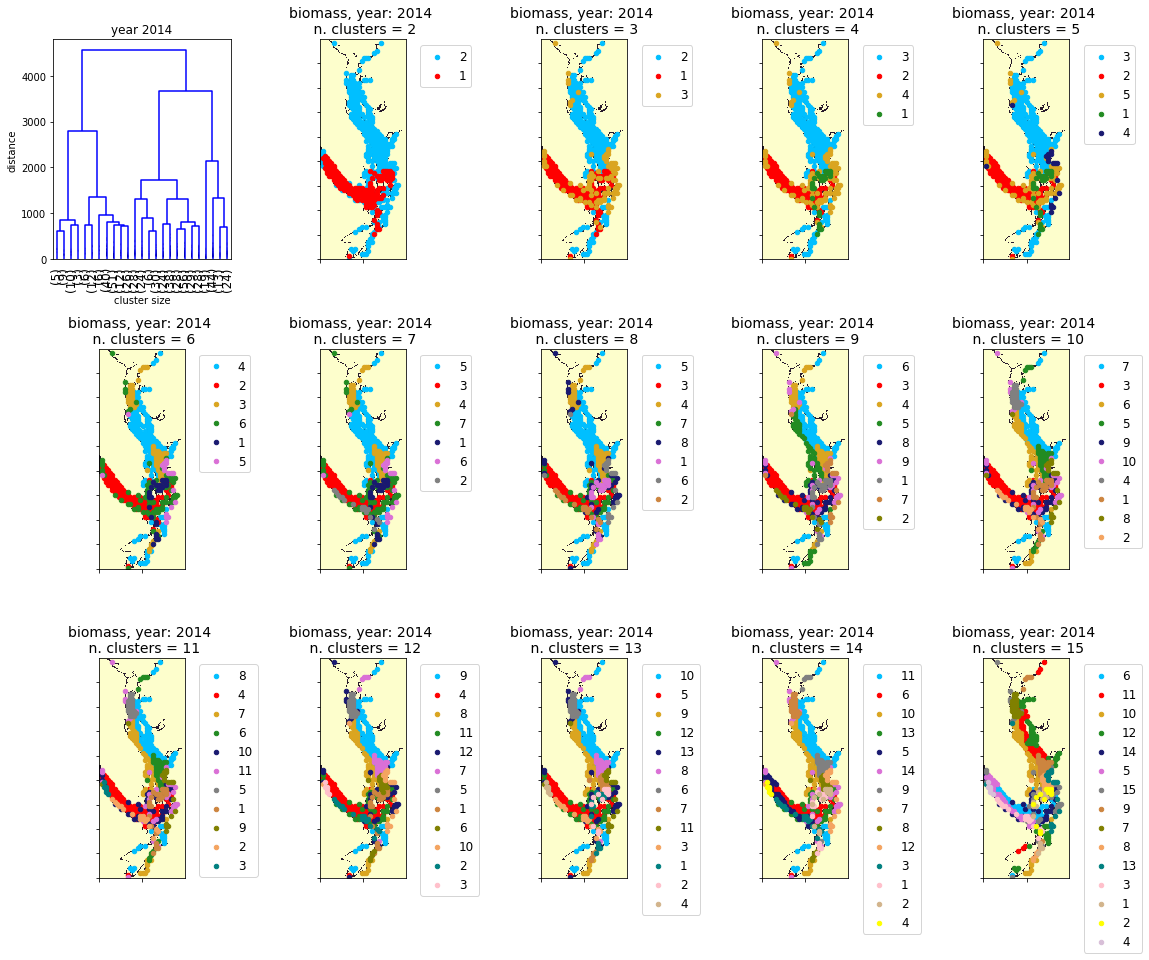

In [11]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('./pkls/biomass_linkmat_2014.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2014','biomass',2)
vp.clusters(axs[0,2],'2014','biomass',3)
vp.clusters(axs[0,3],'2014','biomass',4)
vp.clusters(axs[0,4],'2014','biomass',5)

vp.clusters(axs[1,0],'2014','biomass',6)
vp.clusters(axs[1,1],'2014','biomass',7)
vp.clusters(axs[1,2],'2014','biomass',8)
vp.clusters(axs[1,3],'2014','biomass',9)
vp.clusters(axs[1,4],'2014','biomass',10)

vp.clusters(axs[2,0],'2014','biomass',11)
vp.clusters(axs[2,1],'2014','biomass',12)
vp.clusters(axs[2,2],'2014','biomass',13)
vp.clusters(axs[2,3],'2014','biomass',14)
vp.clusters(axs[2,4],'2014','biomass',15)

plt.tight_layout()

var = 'BIOMASS'; year = 2014
fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')

## 2015 

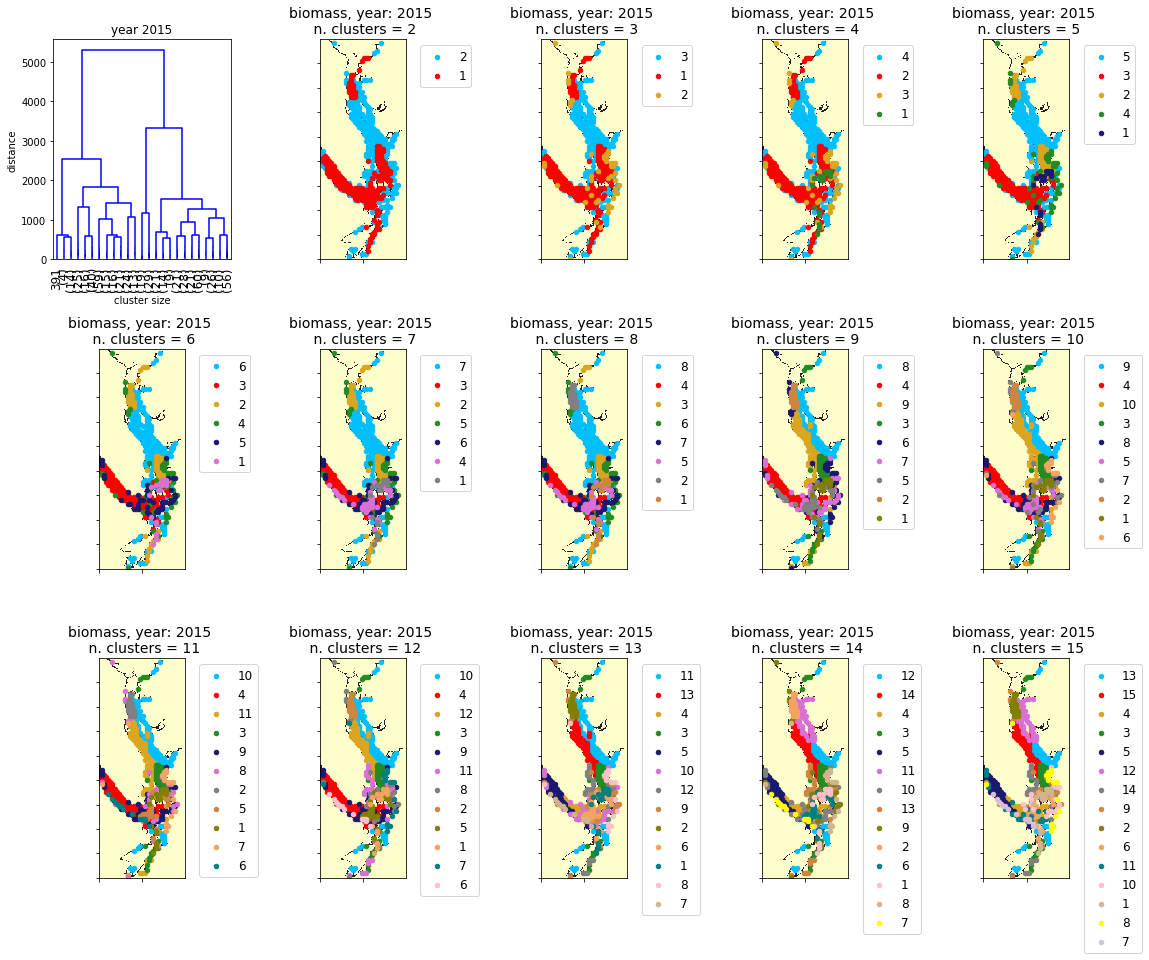

In [12]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('./pkls/biomass_linkmat_2015.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2015','biomass',2)
vp.clusters(axs[0,2],'2015','biomass',3)
vp.clusters(axs[0,3],'2015','biomass',4)
vp.clusters(axs[0,4],'2015','biomass',5)

vp.clusters(axs[1,0],'2015','biomass',6)
vp.clusters(axs[1,1],'2015','biomass',7)
vp.clusters(axs[1,2],'2015','biomass',8)
vp.clusters(axs[1,3],'2015','biomass',9)
vp.clusters(axs[1,4],'2015','biomass',10)

vp.clusters(axs[2,0],'2015','biomass',11)
vp.clusters(axs[2,1],'2015','biomass',12)
vp.clusters(axs[2,2],'2015','biomass',13)
vp.clusters(axs[2,3],'2015','biomass',14)
vp.clusters(axs[2,4],'2015','biomass',15)

plt.tight_layout()

var = 'BIOMASS'; year = 2015
fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


## 2016

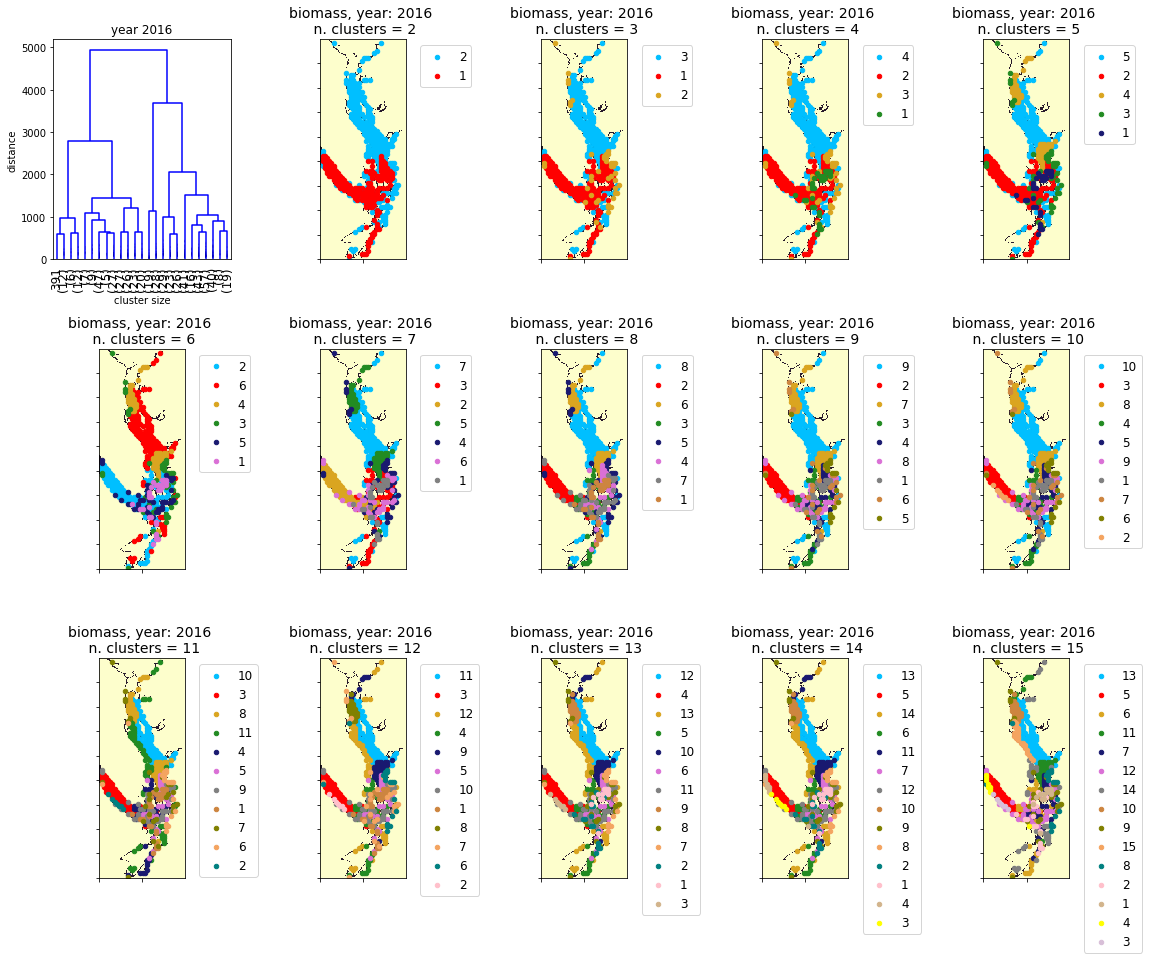

In [13]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('./pkls/biomass_linkmat_2016.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2016','biomass',2)
vp.clusters(axs[0,2],'2016','biomass',3)
vp.clusters(axs[0,3],'2016','biomass',4)
vp.clusters(axs[0,4],'2016','biomass',5)

vp.clusters(axs[1,0],'2016','biomass',6)
vp.clusters(axs[1,1],'2016','biomass',7)
vp.clusters(axs[1,2],'2016','biomass',8)
vp.clusters(axs[1,3],'2016','biomass',9)
vp.clusters(axs[1,4],'2016','biomass',10)

vp.clusters(axs[2,0],'2016','biomass',11)
vp.clusters(axs[2,1],'2016','biomass',12)
vp.clusters(axs[2,2],'2016','biomass',13)
vp.clusters(axs[2,3],'2016','biomass',14)
vp.clusters(axs[2,4],'2016','biomass',15)

plt.tight_layout()

var = 'BIOMASS'; year = 2016
fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')

#### 

In [14]:
cl_2013 = pickle.load(open('./pkls/biomass_clustmat_2013.pkl', 'rb'))
cl_2014 = pickle.load(open('./pkls/biomass_clustmat_2014.pkl', 'rb'))
cl_2015 = pickle.load(open('./pkls/biomass_clustmat_2015.pkl', 'rb'))
cl_2016 = pickle.load(open('./pkls/biomass_clustmat_2016.pkl', 'rb'))
sig_2013 = pickle.load(open('./pkls/biomass_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/biomass_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/biomass_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/biomass_datamat_2016.pkl', 'rb'))


## visualize original clusterings by size and do manual relabeling

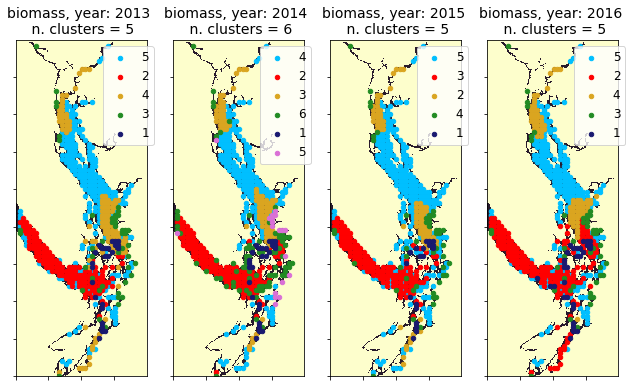

In [15]:
fact = 0.6
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters(axs[0],'2013','biomass',5)
vp.clusters(axs[1],'2014','biomass',6)
vp.clusters(axs[2],'2015','biomass',5)
vp.clusters(axs[3],'2016','biomass',5)

In [16]:


var = 'biomass'
year = 2013
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2013_reass = np.zeros_like(cl_this)
cldes_2013_reass[cl_this == 1] = 1
cldes_2013_reass[cl_this == 2] = 5
cldes_2013_reass[cl_this == 3] = 2
cldes_2013_reass[cl_this == 4] = 4
cldes_2013_reass[cl_this == 5] = 3

year = 2014
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 6    
cl_this = cl[no_clusters-1,:]
cldes_2014_reass = np.zeros_like(cl_this)
cldes_2014_reass[cl_this == 1] = 1
cldes_2014_reass[cl_this == 2] = 5
cldes_2014_reass[cl_this == 3] = 4
cldes_2014_reass[cl_this == 4] = 3
cldes_2014_reass[cl_this == 5] = 2
cldes_2014_reass[cl_this == 6] = 6

year = 2015
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2015_reass = np.zeros_like(cl_this)
cldes_2015_reass[cl_this == 1] = 1
cldes_2015_reass[cl_this == 2] = 4
cldes_2015_reass[cl_this == 3] = 5
cldes_2015_reass[cl_this == 4] = 2
cldes_2015_reass[cl_this == 5] = 3

year = 2016
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2016_reass = np.zeros_like(cl_this)
cldes_2016_reass[cl_this == 1] = 1
cldes_2016_reass[cl_this == 2] = 5
cldes_2016_reass[cl_this == 3] = 2
cldes_2016_reass[cl_this == 4] = 4
cldes_2016_reass[cl_this == 5] = 3





## chceck that reassigning worked

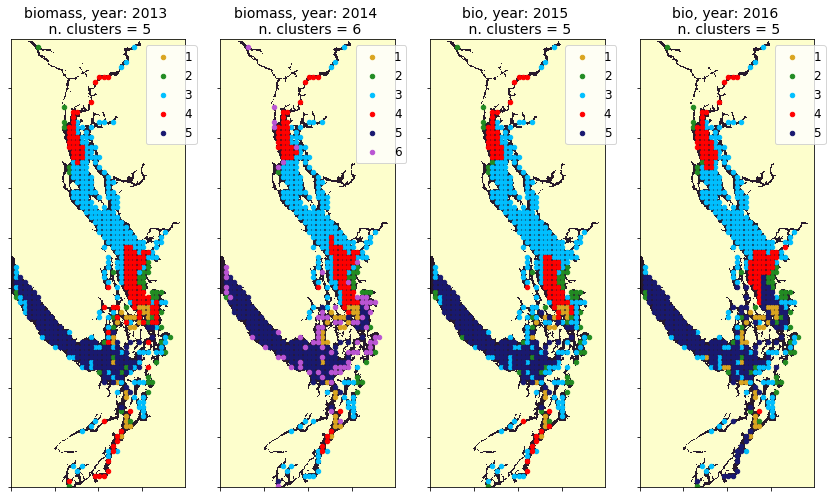

In [17]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'mediumorchid','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
    
reload(vp)
fact = 0.8
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters_basic(axs[0],'2013','biomass',5,cldes_2013_reass, colors)
vp.clusters_basic(axs[1],'2014','biomass',6,cldes_2014_reass, colors)
vp.clusters_basic(axs[2],'2015','bio',5,cldes_2015_reass, colors)
vp.clusters_basic(axs[3],'2016','bio',5,cldes_2016_reass, colors)

In [18]:
pickle.dump(cldes_2013_reass, open('./pkls/BIOMASS_clno_5_2013_reass.pkl', 'wb'))
pickle.dump(cldes_2014_reass, open('./pkls/BIOMASS_clno_6_2014_reass.pkl', 'wb'))
pickle.dump(cldes_2015_reass, open('./pkls/BIOMASS_clno_5_2015_reass.pkl', 'wb'))
pickle.dump(cldes_2016_reass, open('./pkls/BIOMASS_clno_5_2016_reass.pkl', 'wb'))

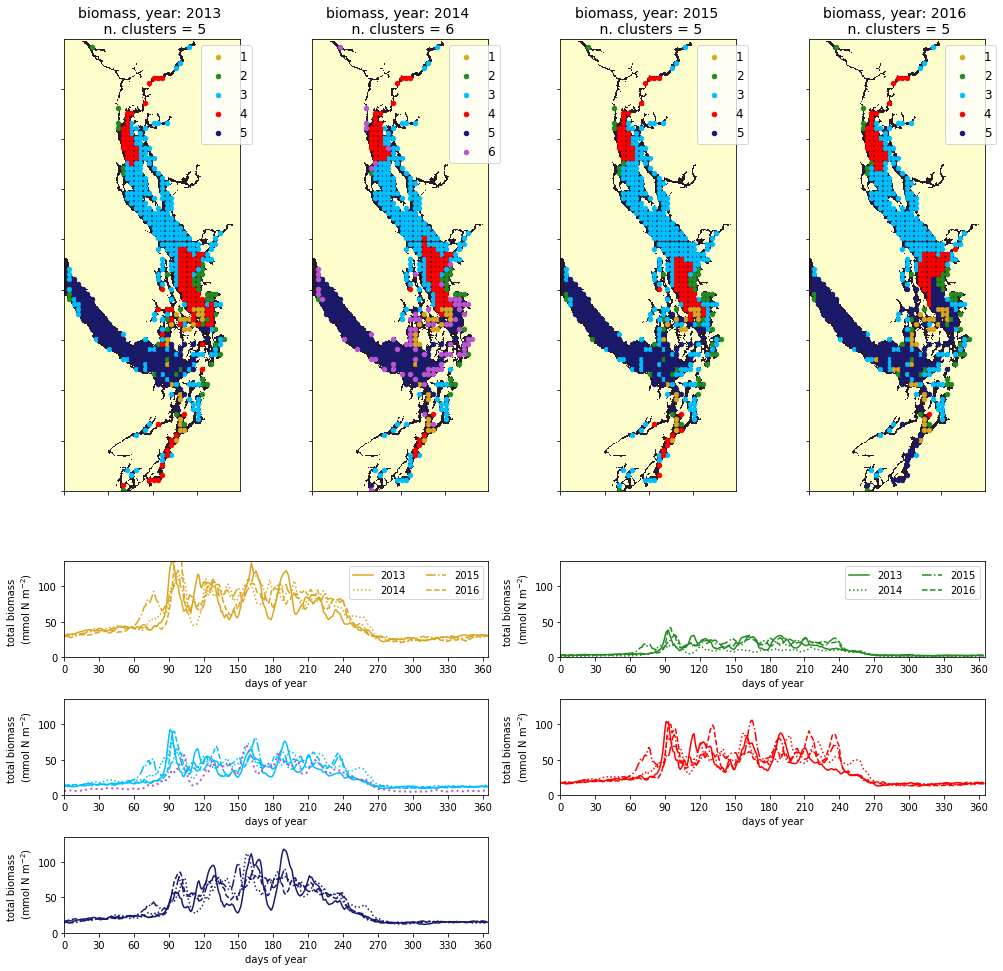

In [19]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,6,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']
t_ylim = 135
t_ylab = 'total biomass \n (mmol N m$^{-2}$)'

fact = 2
fig = plt.figure(figsize=(7*fact, 7*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','biomass',5,cldes_2013_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','biomass',6,cldes_2014_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','biomass',5,cldes_2015_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','biomass',5,cldes_2016_reass, colors)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])

ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])

tclmat = cldes_2014_reass; clustno = 6
tmean = vp.cluster_patterns_mean(sig_2014,tclmat,6,365)
ax1.plot(np.arange(0,365,1),np.squeeze(tmean), color = 'mediumorchid',\
            linestyle = ':', linewidth = 2, label = '2014, cl. 6')

ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')

ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')



plt.tight_layout()

var = 'BIOMASS'
fig.savefig(f'./paper_figs/{var}_4Y_CLUSTERS_SEP.png', bbox_inches='tight')

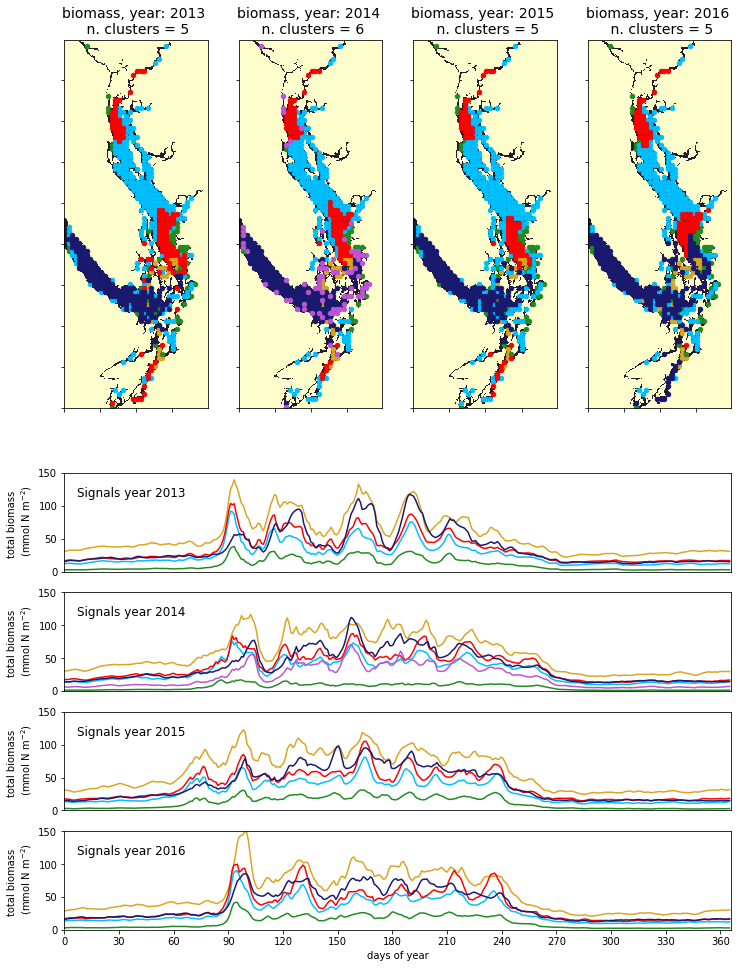

In [20]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,6,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']
t_ylim = 150
t_ylab = 'total biomass \n (mmol N m$^{-2}$)'

fact = 1.5
fig = plt.figure(figsize=(7*fact, 9.25*fact))

ax1 = plt.subplot2grid((8,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','biomass',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','biomass',6,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','biomass',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','biomass',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((8,4), (4,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 0; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2013', y = 0.7, x = 0.1)

ax1 = plt.subplot2grid((8,4), (5,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5,6]; tn = 1; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2014', y = 0.7, x = 0.1)

ax1 = plt.subplot2grid((8,4), (6,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 2; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2015', y = 0.7, x = 0.1)

ax1 = plt.subplot2grid((8,4), (7,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 3; noday = 366
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2016', y = 0.7, x = 0.1)


plt.tight_layout()

var = 'BIOMASS'
fig.savefig(f'./paper_figs/{var}_4Y_YEARS_SEP.png', bbox_inches='tight')

In [22]:
def add_subplot_border(ax, width=1, color=None ):

    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)

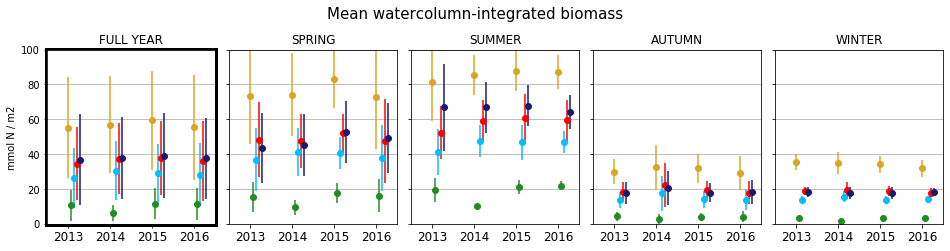

In [27]:
fact = 0.7

fs = 12
#season definitions
#spring march 1 to may 31
spr_st = 59; spr_e = 151; sum_st = 151; sum_e = 243;
aut_st = 243; aut_e = 334;

sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
yrs = [2013,2014,2015,2016]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
clustdes = [1,2,3,4,5]; 
fig = plt.figure(figsize=(19*fact, 4.6*fact))

ax1 = plt.subplot2grid((1,5), (0,0), colspan=1, rowspan=1) 
#noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]; noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean); yrstd = np.nanstd(tmean)
        ax1.errorbar(yr+(i*0.07), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')

ax1.set_xlim([2012.5,2016.5])
ax1.set_ylim([0,100])
ax1.yaxis.grid(True)
ax1.set_xticks([2013,2014,2015,2016])
ax1.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax1.set_ylabel('mmol N / m2')
ax1.set_title('FULL YEAR', fontsize = fs)
add_subplot_border(ax1, width=2, color='black' )

ax2 = plt.subplot2grid((1,5), (0,1), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean[spr_st:spr_e]); yrstd = np.nanstd(tmean[spr_st:spr_e])
        ax2.errorbar(yr+(i*0.07), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,100])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('SPRING', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,2), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean[sum_st:sum_e]); yrstd = np.nanstd(tmean[sum_st:sum_e])
        ax2.errorbar(yr+(i*0.07), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,100])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('SUMMER', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,3), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean[aut_st:aut_e]); yrstd = np.nanstd(tmean[aut_st:aut_e])
        ax2.errorbar(yr+(i*0.07), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,100])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('AUTUMN', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,4), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        wintmean = np.concatenate((tmean[0:spr_st],tmean[aut_e:(np.size(tmean)-1)]),axis = 0)
        yrmean = np.nanmean(wintmean); yrstd = np.nanstd(wintmean)
        ax2.errorbar(yr+(i*0.07), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,100])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('WINTER', fontsize = fs)
plt.suptitle('Mean watercolumn-integrated biomass', fontsize = fs+3, y = 1.07)
plt.tight_layout()
